# Task 1: Introduction

image classification project with tensorflow

We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.


### Import TensorFlow

In [1]:
import tensorflow as tf
print('Using TensorFlow version', tf.__version__)


#tf.logging.set_verbosity(tf.logging.ERROR)
#print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


# Task 2: The Dataset
### Import MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [3]:
print('x_train shape:', x_train.shape) #amt of examples in the datase, 28 rows, 28 columns
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

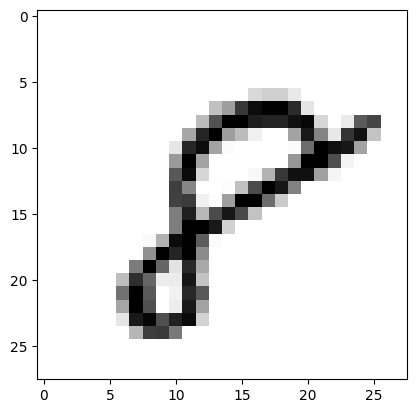

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[59999], cmap='binary')
plt.show()

### Display Labels

In [5]:
y_train[59999]

8

In [6]:
print(set(y_train)) #prints the classes that we have

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train) #to_categorical function encodes y_train and y_test
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [8]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:' , y_test_encoded.shape)

#its still the same amount of examples for both training and test set
#each example is a 10 dimensional vector as per the y value

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [9]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](1_2he above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](1_3)

### Neural Networks

![Neural Network with 2 hidden layers](1_4)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [10]:
import numpy as np

#reshaping the vectors for our x train models using np.reshape, y value represents the desired shape
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

#seeing if they got reshaped
print('x_train_reshaped:' , x_train_reshaped.shape)
print('x_test_reshaped shape:' , x_test_reshaped.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [11]:
print(set(x_train_reshaped[0]))
#this prints values available in the 0th/first example of data fed to TensorFlow

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [12]:
import numpy as np
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm =  (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [13]:
print(set(x_train_norm[0]))
#much smaller values because we struck down distribution of the scale

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [14]:
#creating neural network with sequential class defined in keras and add layers
#two hidden layers with 128 nodes each and one output layer with 10 nodes for the 10 classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Input layer is just the input examples when using 'Sequential' class
#output of first line of dense layer is the input of the second line of dense layer.
#no need to specify input shape for second dense layer
#128,128,10 are all the number of nodes for each respetive dense node
#Each line of code within the sequential class is a "layer"
model = Sequential([
    Dense(128, activation = 'relu', input_shape =(784,)),
    Dense(128, activation ='relu'),
    Dense(10, activation ='softmax')
])


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](1_5)

### Compiling the Model

In [15]:
#Predicted output and actual outputs given difference, should be minimized for more acurate model
#optimization algorithm minimizes this difference

model.compile(
    optimizer= 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary() #displays architecture of the model
#model shows first dense layer with 128 nodes and dense_1 with 128 nodes and so on


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [16]:
#epoch is an iteration of all the examples going through the model
#its going to go thru the examples 8 times as epoch is set to 8
# the more epochs, the more accurate

model.fit(x_train_norm, y_train_encoded, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3744 - accuracy: 0.8909
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1933 - accuracy: 0.9432
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9572
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1186 - accuracy: 0.9660
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.9712
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9750
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9781
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9805


### Evaluating the Model

In [17]:
#making the sure the model didnt memorize the examples
#if this accuracy is high then thats good but if low then model just memorized examples
#does forward pass to understand the prediction of the model and compares with the actual labels
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
if accuracy * 100 > 89:
    print("Training was successful! Accuracy was:", str(accuracy*100) + '%')
    #print("Training was successful! Accuracy was:", accuracy*100)
elif accuracy * 100 < 89:
    print("Training failed. Accuracy was:", accuracy*100)




313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9708
Training was successful! Accuracy was: 97.079998254776%


# Task 8: Predictions

### Predictions on Test Set

In [18]:
preds = model.predict(x_test_norm)
print('Shape of predictions:', preds.shape)

313/313 [==============================] - 1s 2ms/step
Shape of predictions: (10000, 10)


### Plotting the Results

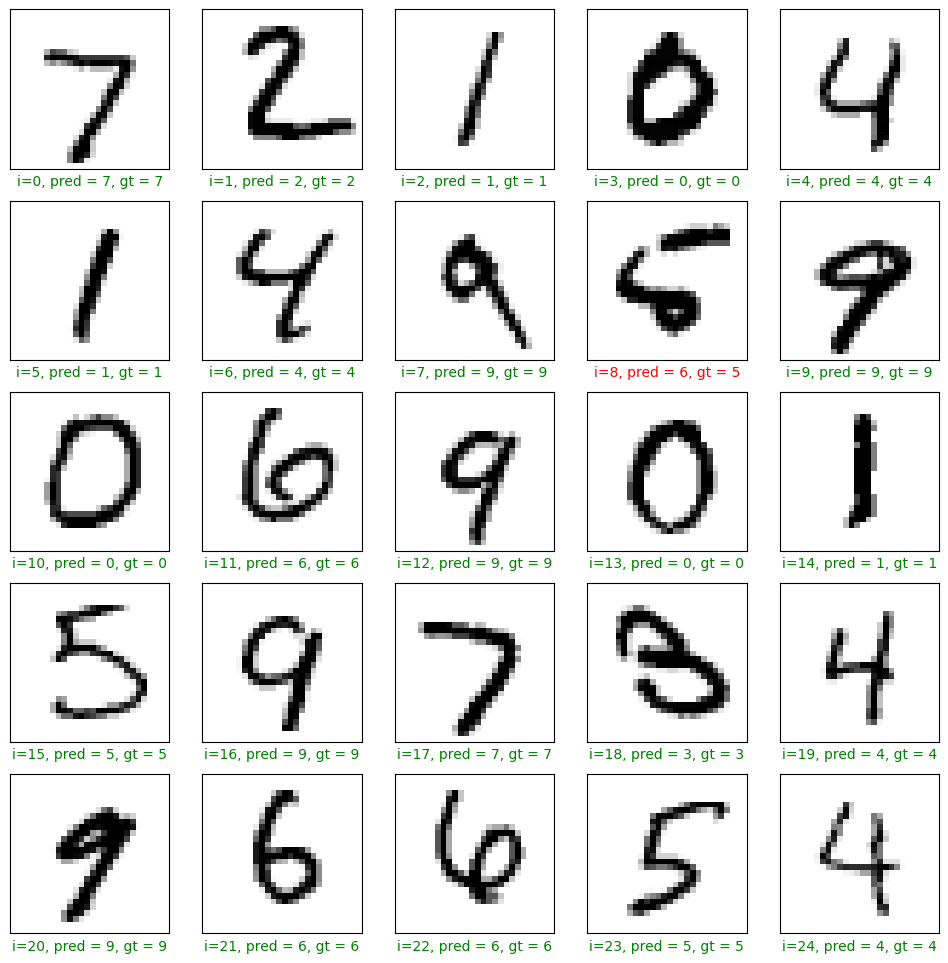

In [19]:
plt.figure(figsize=(12,12))

#gt represents groundtest
start_index = 0

for x in range(25):
    plt.subplot(5, 5, x+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+x])
    gt = y_test[start_index+x]

    col = 'g'
    if pred != gt:
        col = 'r'

    plt.xlabel('i={}, pred = {}, gt = {}'.format(start_index+x, pred, gt), color=col)
    plt.imshow(x_test[start_index+x], cmap='binary')
plt.show()


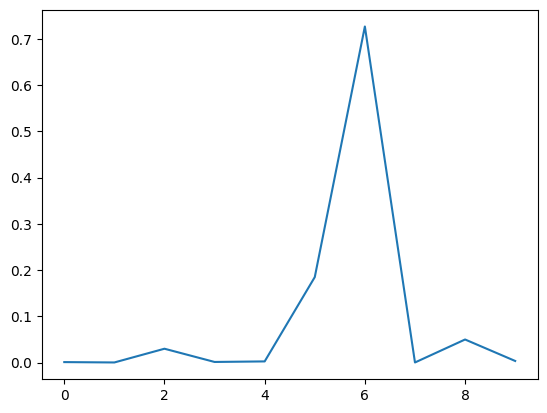

In [20]:
plt.plot(preds[8])
plt.show()
#tells us the softmax probability when looking at index 8, the prediction is 6 and its indeed 5
#theres a decent probability around 20% of getting the correct prediction of 6 as observable in the graph